In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel(r'data/preprocessed_data.xlsx')
df.head()

,Unnamed: 0,text,label,processed_text,emoji_count,hashtag_count,punctuation_counts
0,0,❝ မိုးလင်းတာနဲ့ မောနီးဆိုပြီးပို့မယ့်သူတော့မရှ...,1,မိုး လင်း မော နီး ပို့ မယ့် ငွေ ထုတ် ပို့ တန်း...,0,6,64
1,1,❝ လျောင့်တွေ ထတော့ထတော့ ဆိုဒ်ကွဲနေပြီထတော့\nတေ...,1,လျောင့် ထ ထ ဆိုဒ် ကွဲ ထ တော သား အား အိပ်,0,0,0
2,2,❝ မင်္ဂလာရှိသော မနက်ခင်းလေးပါရှင့် ❞ \n\nစိတ်၏...,-1,မင်္ဂ နက် ခင်း ရှင့် စိတ် ချမ်း ကိုယ် ကျန်း မာ...,0,0,0
3,3,သုံးဆယ့်တစ်ဘုံ၌ ကျင်လည်ကြကုန်သော \nလူ၊နတ်၊ဗြမ္...,-1,သုံး ဆယ့် ဘုံ ၌ ကျင် လည် ကုန် နတ် ဗြမ္မာ သတ္တ ...,0,0,23
4,4,⏰ ⏰\n\nမနက် ( ) နာရီထိရှိနေမှာမို့လို့ ယူ...,1,နက် နာ ရီ ထိ မို့ ယူ နစ် အပ် ရှ င့်,2,8,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19347 entries, 0 to 19346
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          19347 non-null  int64 
 1   text                19347 non-null  object
 2   label               19347 non-null  int64 
 3   processed_text      19347 non-null  object
 4   emoji_count         19347 non-null  int64 
 5   hashtag_count       19347 non-null  int64 
 6   punctuation_counts  19347 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.0+ MB


In [4]:
non_scam = df[df['label'] == -1]
scam = df[df['label'] == 1]
potential_scam = df[df['label'] == 0]

In [26]:
count =df['label'].value_counts()
print(count[-1])

10905


In [5]:
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.set_categories([-1, 0, 1], ordered=True)

In [6]:
print(df.describe())  # Summary statistics for numerical features
print(df['label'].value_counts())  # Check class distribution

         Unnamed: 0   emoji_count  hashtag_count  punctuation_counts
count  19347.000000  19347.000000   19347.000000        19347.000000
mean    9736.578746      1.591668       1.835995            5.851243
std     5614.985183      3.519600       3.118417           14.021380
min        0.000000      0.000000       0.000000            0.000000
25%     4879.500000      0.000000       0.000000            0.000000
50%     9761.000000      0.000000       0.000000            2.000000
75%    14597.500000      2.000000       3.000000            5.000000
max    19434.000000     81.000000      43.000000          451.000000
label
-1    10905
 1     5961
 0     2481
Name: count, dtype: int64


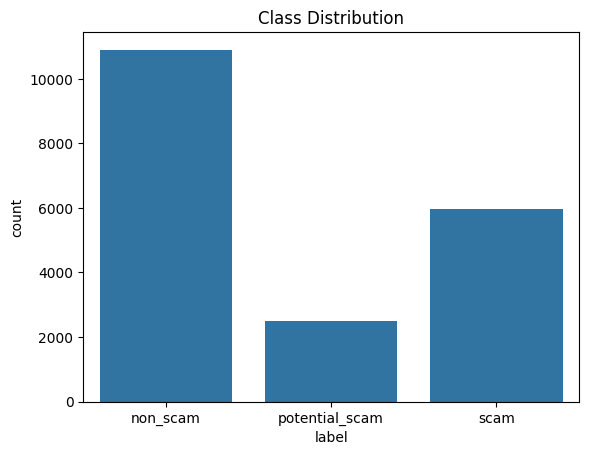

In [7]:
import seaborn as sns
sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.xticks(ticks=[0,1,2],labels=['non_scam','potential_scam','scam',])
plt.show()


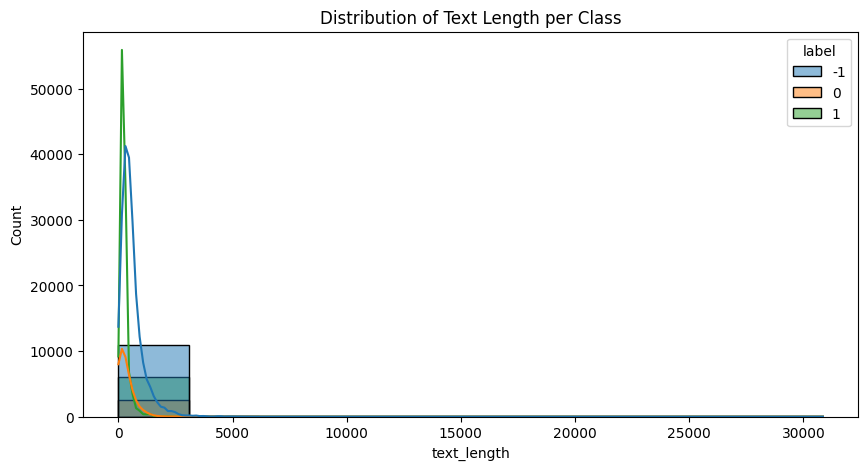

In [8]:
df['text_length'] = df['processed_text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='text_length', hue='label', bins=10, kde=True)
plt.title("Distribution of Text Length per Class")
plt.show()

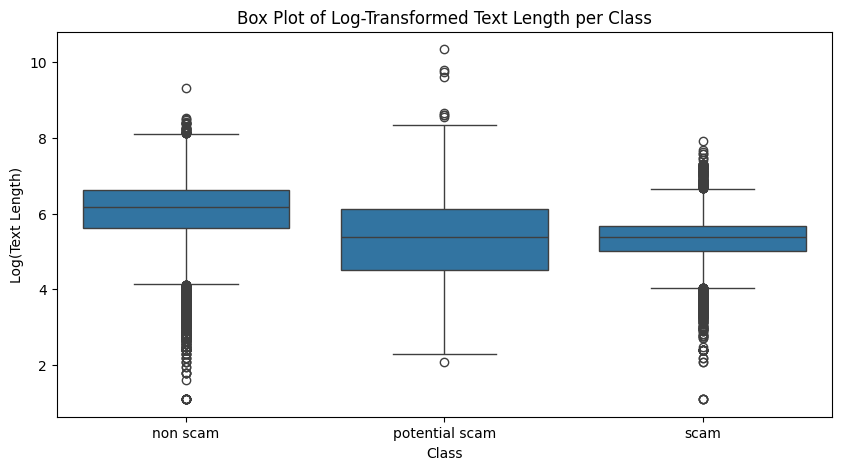

In [9]:

df['log_text_length'] = np.log1p(df['text_length'])  # Apply log transformation

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='label', y='log_text_length', order=[-1, 0, 1])
plt.title("Box Plot of Log-Transformed Text Length per Class")
plt.xlabel("Class")
plt.xticks(ticks=[0, 1, 2], labels=['non scam', 'potential scam', 'scam'])  # Adjusting ticks to match Seaborn's default placement
plt.ylabel("Log(Text Length)")
plt.show()

Non-scam messages:

Have the highest median log-text length.
The spread (IQR) suggests moderate variability in message lengths.
Presence of many lower-end outliers, indicating some very short non-scam messages.

Potential scam messages:

Have a lower median log-text length than non-scam messages.
A wider spread (larger IQR) than the other two categories.
The presence of many lower-end outliers, which could be very short scam-like messages.

Scam messages:

Have the lowest median log-text length, indicating that scams tend to be shorter.
The distribution is more compressed, meaning scam messages have less variability in length.
A significant number of lower-end outliers, showing that some scam messages are extremely short.

Summary:

Scam messages are generally shorter compared to non-scam and potential scam messages.
This aligns with the expectation that scam messages often use concise, attention-grabbing language.
Potential scam messages have the most variability, suggesting a mix of message structures.
Non-scam messages are the longest, which could be because legitimate messages include formal communication, detailed explanations, or terms & conditions.

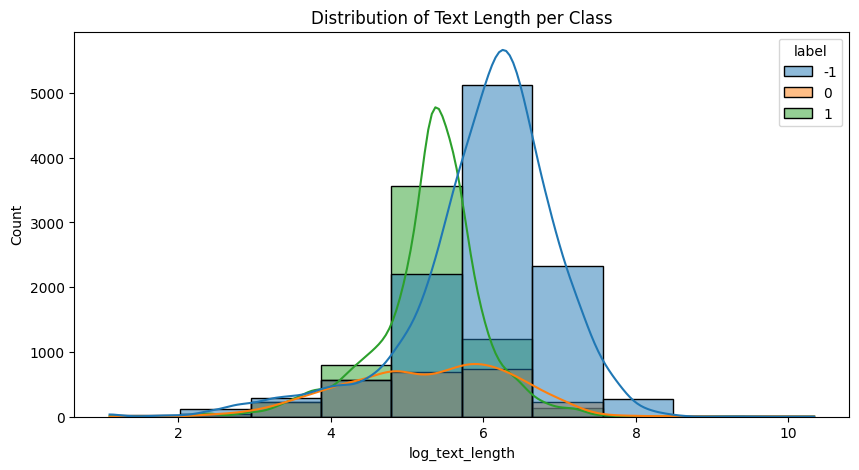

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='log_text_length', hue='label', bins=10, kde=True)
plt.title("Distribution of Text Length per Class")
plt.show()

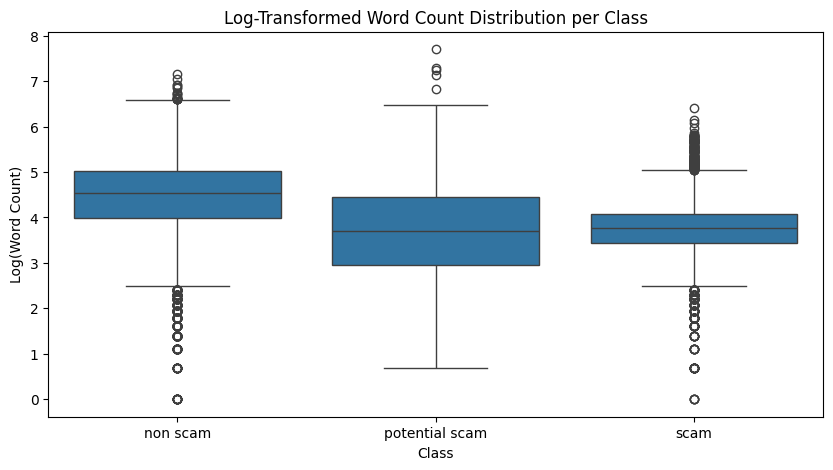

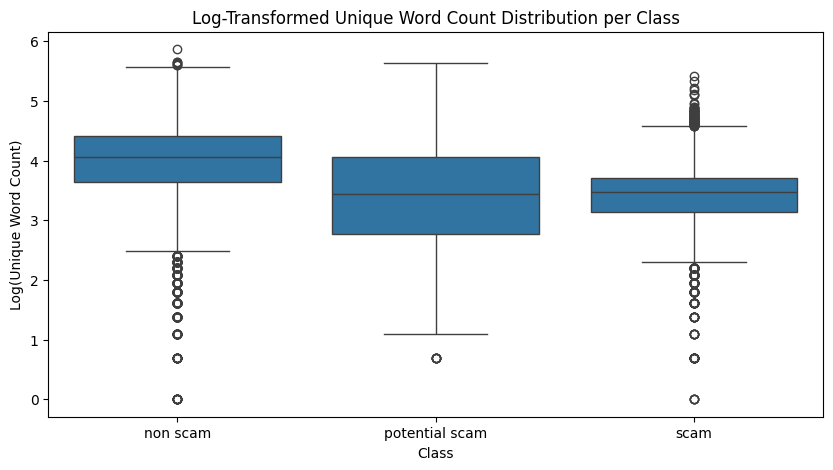

In [11]:
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))
df['unique_word_count'] = df['processed_text'].apply(lambda x: len(set(x.split())))
# Apply log transformation (log1p avoids log(0) issues)
df['log_word_count'] = np.log1p(df['word_count'])
df['log_unique_word_count'] = np.log1p(df['unique_word_count'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='log_word_count', data=df)
plt.title("Log-Transformed Word Count Distribution per Class")
plt.xlabel("Class")
plt.xticks(ticks=[0, 1, 2], labels=['non scam', 'potential scam', 'scam'])  # Adjusting ticks to match Seaborn's default placement
plt.ylabel("Log(Word Count)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='log_unique_word_count', data=df)
plt.title("Log-Transformed Unique Word Count Distribution per Class")
plt.xlabel("Class")
plt.xticks(ticks=[0, 1, 2], labels=['non scam', 'potential scam', 'scam'])  # Adjusting ticks to match Seaborn's default placement
plt.ylabel("Log(Unique Word Count)")
plt.show()

Word count distribution:

Non-Scam Messages:
Median log-word count is relatively higher than the other two categories.
Distribution is fairly symmetric with a moderate spread.
Some extreme outliers with very low word counts exist.

Potential Scam Messages:
Has a broader spread compared to the scam category.
The median word count is lower than non-scam messages but higher than scam messages.
The presence of a few high-word-count outliers.

Scam Messages:
The lowest median word count among the three classes.
The distribution is more compact, indicating less variation in word counts.
Numerous outliers with very low word counts suggest some scam messages are extremely short.

Interpretation & Insights:
Scam messages tend to be shorter than both non-scam and potential scam messages, likely due to their direct nature.
Non-scam messages are generally longer, possibly because they contain more detailed or conversational content.
Potential scam messages fall between the two categories, suggesting that some of them resemble scam messages in length, while others resemble non-scam messages.
Presence of outliers in all categories, especially in non-scam and scam classes, indicates variability in message length.


Unique word count distribution

The non scam class has a relatively high median unique word count, with a tight interquartile range (IQR), indicating that most non-scam messages have a moderate-to-high unique word count.
The potential scam class exhibits a wider IQR, with a median unique word count lower than non-scam messages. This suggests a greater variance in unique word usage among potential scam messages.
The scam class has the lowest median unique word count and a relatively smaller IQR, indicating that scam messages tend to have a more restricted vocabulary.

All three classes contain outliers, but the scam category shows a notable concentration of lower-end outliers, suggesting that some scam messages contain extremely few unique words.
The non scam and potential scam classes have outliers on both ends, implying variability in their message lengths.
Overall Insights:

Scam messages generally have fewer unique words, likely reflecting a formulaic and repetitive structure, possibly to maintain consistency in fraudulent schemes.
Non scam messages have higher linguistic diversity, which aligns with natural conversation patterns.
Potential scam messages fall in between, suggesting they may share characteristics of both classes.

In [12]:
non_scam = df[df['label'] == 0]
scam = df[df['label'] == 1]
potential_scam = df[df['label'] == 2]

print(f"Total Rows for Non Scam text: {non_scam.shape[0]}")
print(f"Total Rows for Scam text: {scam.shape[0]}")
print(f"Total Rows for Potential Scam text: {potential_scam.shape[0]}")

Total Rows for Non Scam text: 2481
Total Rows for Scam text: 5961
Total Rows for Potential Scam text: 0


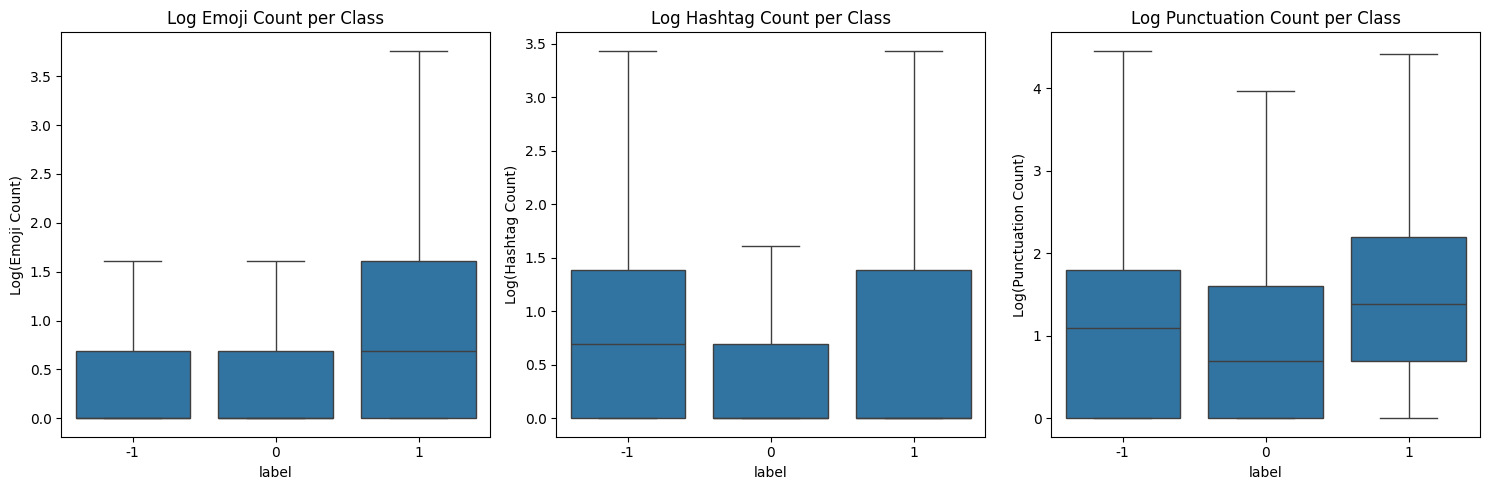

In [13]:
df['log_emoji_count'] = np.log1p(df['emoji_count'])  
df['log_hashtag_count'] = np.log1p(df['hashtag_count'])  
df['log_punctuation_counts'] = np.log1p(df['punctuation_counts']) 

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box Plot for Emoji Count
sns.boxplot(x='label', y='log_emoji_count', data=df, ax=axes[0], showfliers=False)  # Hide outliers
axes[0].set_title('Log Emoji Count per Class')
axes[0].set_ylabel("Log(Emoji Count)")

# Box Plot for Hashtag Count
sns.boxplot(x='label', y='log_hashtag_count', data=df, ax=axes[1], showfliers=False)
axes[1].set_title('Log Hashtag Count per Class')
axes[1].set_ylabel("Log(Hashtag Count)")

# Box Plot for Punctuation Count
sns.boxplot(x='label', y='log_punctuation_counts', data=df, ax=axes[2], showfliers=False)
axes[2].set_title('Log Punctuation Count per Class')
axes[2].set_ylabel("Log(Punctuation Count)")

plt.tight_layout()
plt.show()

Emoji Usage:

Observation: The median emoji count is relatively low across all three classes.
Scam messages (1) show a slightly higher variability in emoji usage compared to non-scam (-1) and potential scam (0) messages.

Implication: Scam messages may use more emojis, possibly to attract attention or imitate casual communication styles.

Hashtag Usage:

Observation:
Non-scam (-1) and scam (1) messages have higher hashtag counts compared to potential scam (0).
Scam (1) and non-scam (-1) messages show greater variability, while potential scam (0) messages tend to have fewer hashtags on average.
Implication:
Non-scam messages (e.g., business promotions) often contain hashtags for engagement.
Scam messages may mimic marketing patterns or attempt to increase visibility on social media.
Potential scam messages (0) having fewer hashtags suggests they might be less structured or rely more on direct persuasion.

Punctuation Usage:

Observation:
Scam messages (1) contain the most punctuation, showing a slightly higher median and variability.
Non-scam (-1) and potential scam (0) messages have a similar punctuation distribution.
Implication:
Scam messages might use excessive punctuation (e.g., exclamation marks, question marks) to create urgency or excitement.
This could be a useful feature in scam detection models.

Key Takeaways
Scam messages tend to use more emojis, hashtags, and punctuation, possibly to increase engagement and urgency.
Potential scam messages appear to have fewer hashtags than both scam and non-scam messages, suggesting a more direct approach.
Punctuation count could be a distinguishing feature for scam messages, as they likely use more exclamation marks or repeated punctuation.

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Function to get top N words from a specific label category
def get_top_words(texts, n=20):
    words = " ".join(texts).split()  # Tokenize words
    word_counts = Counter(words)  # Count word frequency
    return word_counts.most_common(n)  # Get top N words

# Get top words for each category
top_non_scam = get_top_words(df[df['label'] == 0]['processed_text'])
top_scam = get_top_words(df[df['label'] == 1]['processed_text'])
top_potential_scam = get_top_words(df[df['label'] == 2]['processed_text'])
print(top_potential_scam)

[]


C:\Users\nuwai\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4129 (\N{MYANMAR LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nuwai\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4100 (\N{MYANMAR LETTER NGA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nuwai\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4157 (\N{MYANMAR CONSONANT SIGN MEDIAL WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nuwai\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 4145 (\N{MYANMAR VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nuwai\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 41

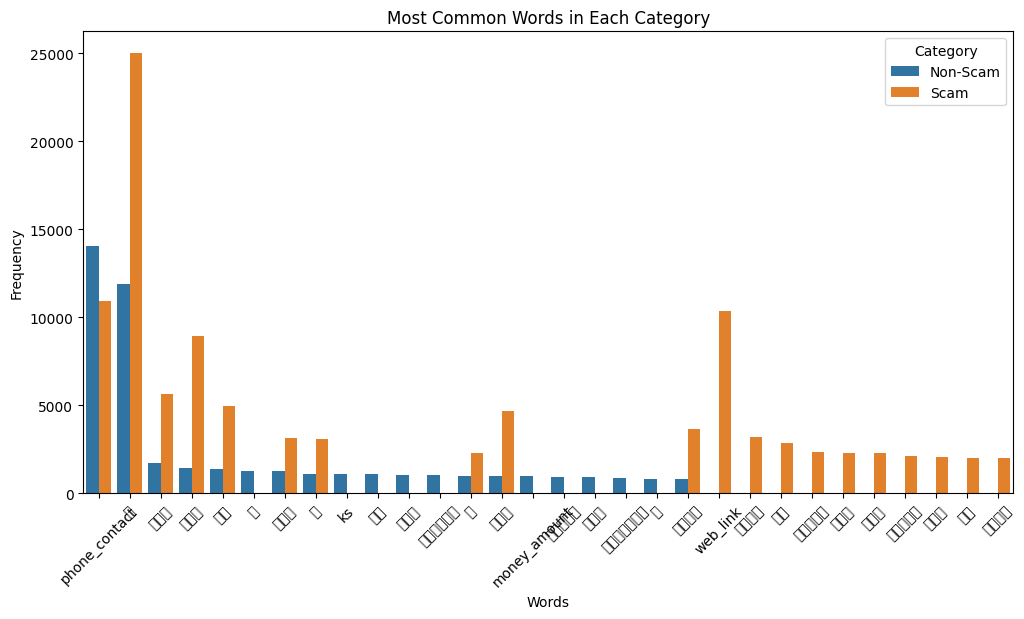

In [15]:
# Convert to DataFrame
df_top_non_scam = pd.DataFrame(top_non_scam, columns=['word', 'count']).assign(label="Non-Scam")
df_top_scam = pd.DataFrame(top_scam, columns=['word', 'count']).assign(label="Scam")
df_top_potential_scam = pd.DataFrame(top_potential_scam, columns=['word', 'count']).assign(label="Potential Scam")

# Combine all into one DataFrame
df_top_words = pd.concat([df_top_non_scam, df_top_scam, df_top_potential_scam])
df_top_words.head()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_words, x='word', y='count', hue='label')
plt.xticks(rotation=45)
plt.title("Most Common Words in Each Category")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend(title="Category")
plt.show()

In [16]:
# import matplotlib.font_manager as fm

# # Load Burmese font
# burmese_font_path = "C:/Users/nuwai/Documents/Sophia_Skill_Development/NotoSansMyanmar-SemiBold.ttf"
# burmese_font = fm.FontProperties(fname=burmese_font_path)

# # Create a figure with 3 subplots, one for each category
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # Loop through each category and create a plot
# categories = ["Non-Scam", "Scam", "Potential Scam"]
# for i, category in enumerate(categories):
#     # Filter data for the current category
#     df_category = df_top_words[df_top_words['label'] == category]

#     # Create barplot for each category
#     sns.barplot(data=df_category, x='word', y='count', hue='label', ax=axes[i])

#     # Apply Burmese font to the plot
#     axes[i].set_title(f"Most Common Words in {category}", fontproperties=burmese_font, fontsize=16)
#     axes[i].set_xlabel("Words", fontproperties=burmese_font, fontsize=14)
#     axes[i].set_ylabel("Frequency", fontproperties=burmese_font, fontsize=14)
#     axes[i].tick_params(axis='x', rotation=45)
#     axes[i].legend(title="Category", prop=burmese_font, fontsize=12)

# # Tighten layout and show the plots
# plt.tight_layout()
# plt.show()

In [17]:
# from wordcloud import WordCloud

# # Generate WordCloud for each category
# for category, name in zip([non_scam, scam, potential_scam], ["Non-Scam", "Scam", "Potential Scam"]):
#     text = " ".join(category['processed_text'])
    
#     # Create WordCloud with the Burmese font
#     wordcloud = WordCloud(
#         font_path=burmese_font_path,  # Use the font path here
#         width=800, 
#         height=400, 
#         background_color='white'
#     ).generate(text)

#     # Plot WordCloud
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")
#     plt.title(f"WordCloud for {name}")
#     plt.show()

In [18]:
from collections import Counter
from nltk.util import ngrams
import nltk

scam_texts = " ".join(scam['processed_text'])
bigrams = list(ngrams(scam_texts.split(), 2))
trigrams = list(ngrams(scam_texts.split(), 3))

bigram_freq = Counter(bigrams).most_common(10)
trigram_freq = Counter(trigrams).most_common(10)

print("Top 10 Bigrams in Scam Texts:", bigram_freq)
print("Top 10 Trigrams in Scam Texts:", trigram_freq)

Top 10 Bigrams in Scam Texts: [(('web_link', 'web_link'), 4164), (('phone_contact', 'phone_contact'), 3966), (('ရှ', 'င့်'), 2824), (('ကော', 'င့်'), 2023), (('အ', 'ကော'), 2015), (('ဖွ', 'င့်'), 2013), (('အ', 'တွက်'), 1863), (('ဆက်', 'သွယ်'), 1849), (('င့်', 'ဖွ'), 1659), (('အ', 'စိတ်'), 1425)]
Top 10 Trigrams in Scam Texts: [(('web_link', 'web_link', 'web_link'), 2045), (('အ', 'ကော', 'င့်'), 2014), (('phone_contact', 'phone_contact', 'phone_contact'), 1680), (('င့်', 'ဖွ', 'င့်'), 1659), (('ကော', 'င့်', 'ဖွ'), 1644), (('ဖွ', 'င့်', 'ရန်'), 1334), (('ဆက်', 'သွယ်', 'ရန်'), 934), (('center', 'phone_contact', 'phone_contact'), 837), (('မေး', 'မြန်း', 'ရှ'), 797), (('မြန်း', 'ရှ', 'င့်'), 795)]


In [19]:
# import nltk
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Download the necessary resource for sentiment analysis
# nltk.download('vader_lexicon')

# # Initialize the SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

# # Assuming 'processed_text' contains the cleaned text (you can replace with the relevant column name if different)
# df['Sentiment'] = df['processed_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# # Sentiment Distribution - Visualize the Sentiment Scores
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Sentiment'], bins=20, kde=True, color='blue')
# plt.title("Sentiment Analysis Distribution")
# plt.xlabel("Sentiment Score")
# plt.ylabel("Frequency")
# plt.show()

# # Sentiment by Category (Non-Scam, Scam, Potential Scam)
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='label', y='Sentiment', data=df, palette='Set3')
# plt.title("Sentiment Score by Category")
# plt.xlabel("Label (Non-Scam, Scam, Potential Scam)")
# plt.ylabel("Sentiment Score")
# plt.show()